# Implementation of Ridge Regression based on Multiple Regression with Gradient Descent

sklearn values will be taken as referene ones

In [5]:
import os
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [6]:
print(os.listdir('datasets'))

['glass.csv', 'dataset_4.txt', 'dataset_3.txt', 'dataset_2.txt', 'dataset_1.txt', 'ign.csv', 'spam.csv']


In [50]:
full_data = pd.read_csv('datasets/dataset_2.txt')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
horsepower           205 non-null float64
highway-mpg          205 non-null float64
symboling            205 non-null float64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               20

In [51]:
full_data['num-of-cylinders'].unique()

array(['four', 'six', 'eight', 'five'], dtype=object)

In [52]:
full_data['num-of-cylinders'] = full_data['num-of-cylinders'].map({'four': 4., 'six': 6., 'eight': 8., 'five': 5.})
full_data['num-of-cylinders'].unique()

array([ 4.,  6.,  8.,  5.])

In [53]:
data = full_data[['horsepower', 'highway-mpg', 'length', 'width', 'height', \
                  'num-of-cylinders', 'wheel-base',  'curb-weight', 'engine-size', 'peak-rpm', \
                  'city-mpg', \
                  'price']]

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 12 columns):
horsepower          205 non-null float64
highway-mpg         205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
num-of-cylinders    205 non-null float64
wheel-base          205 non-null float64
curb-weight         205 non-null float64
engine-size         205 non-null float64
peak-rpm            205 non-null float64
city-mpg            205 non-null float64
price               205 non-null float64
dtypes: float64(12)
memory usage: 30.8 KB


In [70]:
X = data.iloc[:, 0:11]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 11 columns):
horsepower          205 non-null float64
highway-mpg         205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
num-of-cylinders    205 non-null float64
wheel-base          205 non-null float64
curb-weight         205 non-null float64
engine-size         205 non-null float64
peak-rpm            205 non-null float64
city-mpg            205 non-null float64
dtypes: float64(11)
memory usage: 29.2 KB


In [200]:
X.describe()

,horsepower,highway-mpg,length,width,height,num-of-cylinders,wheel-base,curb-weight,engine-size,peak-rpm,city-mpg
count,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.591133,31.04878,174.464390,65.856585,53.810244,4.317073,99.109756,2541.629268,125.868293,5095.073892,25.551220
std,35.784832,6.48736,11.971631,1.970274,2.403743,0.864298,6.160461,468.564191,41.017419,514.114858,5.717496
min,52.000000,16.00000,150.000000,63.400000,49.400000,4.000000,89.500000,1889.000000,90.000000,4150.000000,14.000000
25%,70.000000,26.00000,166.800000,64.200000,52.000000,4.000000,94.500000,2204.000000,98.000000,4800.000000,21.000000
50%,95.000000,30.00000,173.000000,65.500000,54.100000,4.000000,97.200000,2385.000000,110.000000,5200.000000,25.000000
75%,116.000000,34.00000,183.500000,66.500000,55.700000,4.000000,102.400000,2912.000000,141.000000,5500.000000,30.000000
max,207.000000,47.00000,208.100000,72.000000,59.800000,8.000000,120.900000,3900.000000,308.000000,6600.000000,38.000000


In [74]:
y = data.iloc[:, 11]
y.describe()

count      205.000000
mean     12635.575610
std       7635.389258
min       5118.000000
25%       7957.000000
50%       9959.000000
75%      15510.000000
max      45400.000000
Name: price, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2018)

In [269]:
print(X_train.shape)

(164, 11)


## Multiple Regression

In [279]:
class MultipleRegression:
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.lr = learning_rate
        self.iters = iterations
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        self.n = X_train.shape[0]
        ones = np.ones((self.n, 1))
        
        self.X = np.concatenate((self.X, ones), axis=1)
        self.Xtrans = np.transpose(self.X)
        
        temp = np.dot(self.Xtrans, self.X)
        temp = np.linalg.pinv(temp)
        
        self.coefs = np.dot(temp, self.Xtrans)
        self.coefs = np.dot(self.coefs, self.y)
        self.coef = self.coefs[-1]
        self.coefs = self.coefs[:-1]
#         self.apply_gradient()
        
    def apply_gradient(self):
        N = float(len(self.y))
        self.betas = np.zeros(len(self.X) + 1)
        betas_grad = np.zeros(len(self.X) + 1)
#         print(self.X.take(axis=0, indices=1))
        print(self.X[0])
        for i in range(10):
            for j in range(len(self.y)):
                y = self.y[j]
                count = (2/N)
                print(self.X[j])
                for k in range(len(self.X)):
                    pass
#                     x = self.X[y][k]
#                     print(j, k, y, x)
#                     betas_grad[k] -= count * k * (y - ((self.betas[k] * k) + self.betas[0]))
        
    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        
        self.pred = np.dot(self.X_test, self.coefs) + self.coef
        
        squared_error = np.sum((self.y_test - self.pred) ** 2)
        mean = np.mean(self.y_test)
        variance = np.sum((self.y_test - mean) ** 2)
        
        self.rsquared = 1 - squared_error/variance
        return self.rsquared, self.pred
        
        

In [280]:
multiple_reg = MultipleRegression()
multiple_reg.fit(X_train, y_train)
multiple_train_rsquared, _ = multiple_reg.score(X_train, y_train)
multiple_test_rsquared, _ = multiple_reg.score(X_test, y_test)

In [281]:
print('Multiple regression R^2 score: training ', multiple_train_rsquared)
print('Multiple regression R^2 score: test ', multiple_test_rsquared)

Multiple regression R^2 score: training  0.882740645844
Multiple regression R^2 score: test  0.930718097917


## Merging Multiple Regression with Ridge Regression

In [331]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.ridge_reg = self.ridge()
        
    def ridge(self):
        n, p = np.shape(self.X)
        self.X = np.concatenate((self.X, np.sqrt(10.0**self.alpha) * np.identity(p)), axis=0)
        self.y = np.concatenate((self.y, np.zeros(p)), axis=0)
        self.model = MultipleRegression()
        self.model.fit(self.X, self.y)
        
    def score(self, X_test, y_test):
        scores, preds = self.model.score(X_test, y_test)
        return scores

In [332]:
ridge_reg_impl = RidgeRegression(alpha=1.0)
ridge_reg_impl.fit(X_train, y_train)
train_rsquared_impl = ridge_reg_impl.score(X_train, y_train)
test_rsquared_impl = ridge_reg_impl.score(X_test, y_test)

In [333]:
print('Ridge regression R^2 score: training ', train_rsquared_impl)
print('Ridge regression R^2 score: test ', test_rsquared_impl)

Ridge regression R^2 score: training  0.846497488271
Ridge regression R^2 score: test  0.888976957543


## Compare with sklearn Ridge

In [317]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
train_rsquared = ridge_reg.score(X_train, y_train)
test_rsquared = ridge_reg.score(X_test, y_test)

In [318]:
print('Ridge regression R^2 score: training ', train_rsquared)
print('Ridge regression R^2 score: test ', test_rsquared)

Ridge regression R^2 score: training  0.882718713794
Ridge regression R^2 score: test  0.930075583031


## Compare with sklearn Linear Regression

In [319]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
train_rsquared_linear = linear_reg.score(X_train, y_train)
test_rsquared_linear = linear_reg.score(X_test, y_test)

In [320]:
print('Linear regression R^2 score: training ', train_rsquared_linear)
print('Linear regression R^2 score: test ', test_rsquared_linear)

Linear regression R^2 score: training  0.882740645844
Linear regression R^2 score: test  0.930718097917


## Comparison between lambda parameteres for Ridge

In [324]:
lambdas = np.linspace(-7, 7, 100)
r2_train, r2_test = np.zeros(len(lambdas)), np.zeros(len(lambdas)) 
r2_train_impl, r2_test_impl = np.zeros(len(lambdas)), np.zeros(len(lambdas))

In [338]:
for i in range(len(lambdas)):
    model = Ridge(alpha=i)
    model_impl = RidgeRegression(alpha=i)
    model.fit(X_train, y_train)
    model_impl.fit(X_train, y_train)
    
    r2_train[i] = model.score(X_train, y_train)
    r2_test[i] = model.score(X_test, y_test)
    r2_train_impl[i] = model_impl.score(X_train, y_train)
    r2_test_impl[i] = model_impl.score(X_test, y_test)
    print('Lambda', (-7 + i*14/100), 'R2_train: ', r2_train[i], 'R2_test: ', r2_test[i], 'R2_train_impl: ', r2_train_impl[i], 'R2_train_impl: ', r2_test_impl[i])

Lambda -7.0 R2_train:  0.882740645844 R2_test:  0.930718097917 R2_train_impl:  0.847084445041 R2_train_impl:  0.893682018731
Lambda -6.86 R2_train:  0.882718713794 R2_test:  0.930075583031 R2_train_impl:  0.846497488271 R2_train_impl:  0.888976957543
Lambda -6.72 R2_train:  0.882658954254 R2_test:  0.929445245799 R2_train_impl:  0.840969154868 R2_train_impl:  0.874464450776
Lambda -6.58 R2_train:  0.882568956961 R2_test:  0.928829258295 R2_train_impl:  0.836475432921 R2_train_impl:  0.86903065073
Lambda -6.4399999999999995 R2_train:  0.882454729523 R2_test:  0.928228937977 R2_train_impl:  0.831136628712 R2_train_impl:  0.864049563025
Lambda -6.3 R2_train:  0.882321060951 R2_test:  0.927644995848 R2_train_impl:  0.805639622026 R2_train_impl:  0.838213658075
Lambda -6.16 R2_train:  0.882171793563 R2_test:  0.927077713839 R2_train_impl:  0.720977792995 R2_train_impl:  0.786900244771
Lambda -6.02 R2_train:  0.882010028359 R2_test:  0.926527072348 R2_train_impl:  0.679219778807 R2_train_imp

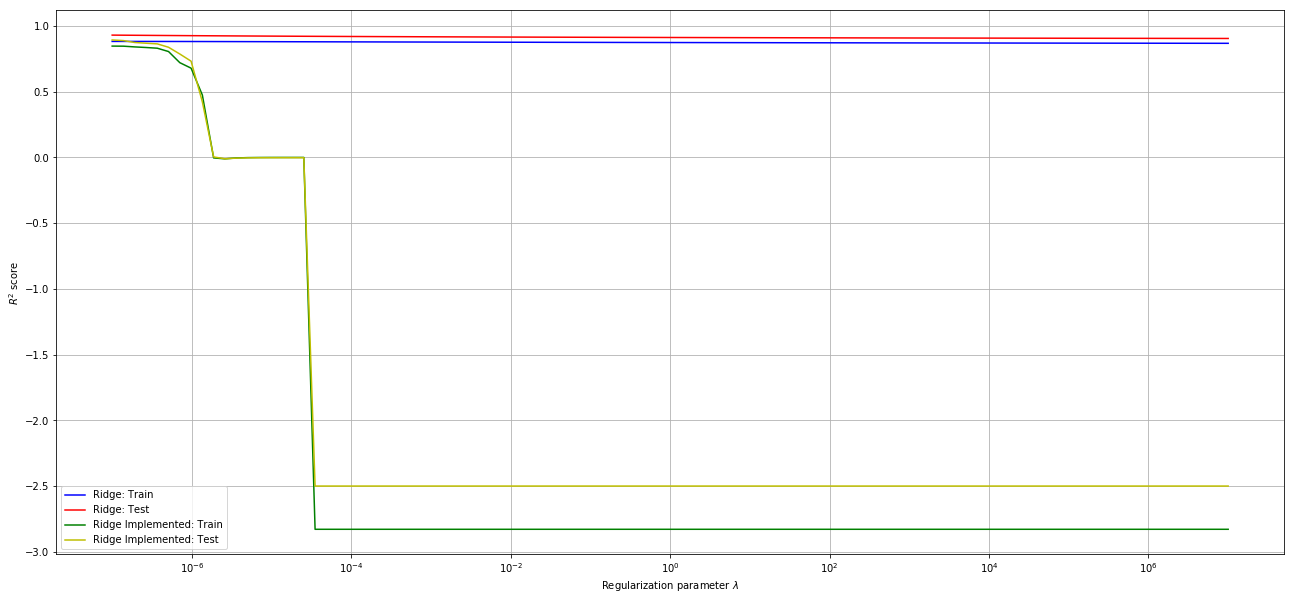

In [335]:
fig, ax = plt.subplots(1, 1, figsize=(22, 10))
ax.semilogx(10.0**lambdas, (r2_train), c='b', label='Ridge: Train')
ax.semilogx(10.0**lambdas, (r2_test), c='r', label='Ridge: Test')
ax.semilogx(10.0**lambdas, (r2_train_impl), c='g', label='Ridge Implemented: Train')
ax.semilogx(10.0**lambdas, (r2_test_impl), c='y', label='Ridge Implemented: Test')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')
ax.legend(loc = 'best')
plt.grid()

# Sum up
### Multiple regression
My own multiple regression got the same scores as sklearn linear regression which shows me that definitely my solution is proper

### Ridge regression
As far as scores are similar to the ones from sklearn, it still needs some updates to perform well

### The plot
The plots shows some weird values for various lambdas. It should be resolved

### Gradient descent
Hope I'll finish it up before deadline but I'm not sure because it still needs some work inside loops for counting and updating derivatives through iterations